In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

# 파일 경로 설정
file_paths_2019 = {
    "01": "상가업소_201906/소상공인시장진흥공단_상가업소정보_201906_01.csv",
    "03": "상가업소_201906/소상공인시장진흥공단_상가업소정보_201906_03.csv",
    "04": "상가업소_201906/소상공인시장진흥공단_상가업소정보_201906_04.csv"
}

# 업종별 대분류 및 중분류 매핑 (2019년 기준)
category_mapping_2019 = {
    "음식": ["음식"],
    "소매": ["소매"],
    "스포츠": ["스포츠", "스포츠/운동"],  # 스포츠와 스포츠/운동 통합
    "오락": ["관광/여가/오락"],  # 관광/여가/오락에서 스포츠/운동 제외
    "숙박": ["숙박"]
}

# 필요한 지역 설정
regions_01 = ['서울특별시', '부산광역시']
regions_03 = ['경기도']
regions_04 = ['제주특별자치도']

# 데이터 병합용 리스트
filtered_data_list_2019 = []

# 01 데이터 처리
data_01 = pd.read_csv(file_paths_2019["01"], encoding="utf-8")
filtered_01 = data_01[data_01["시도명"].isin(regions_01)]
filtered_data_list_2019.append(filtered_01)

# 03 데이터 처리
data_03 = pd.read_csv(file_paths_2019["03"], encoding="utf-8")
filtered_03 = data_03[data_03["시도명"].isin(regions_03)]
filtered_data_list_2019.append(filtered_03)

# 04 데이터 처리
data_04 = pd.read_csv(file_paths_2019["04"], encoding="utf-8")
filtered_04 = data_04[data_04["시도명"].isin(regions_04)]
filtered_data_list_2019.append(filtered_04)

# 모든 데이터를 병합
merged_data_2019 = pd.concat(filtered_data_list_2019, ignore_index=True)

# 대분류와 중분류를 기준으로 분류 추가
def categorize(row):
    # 스포츠 분류: 대분류가 스포츠이거나 중분류가 스포츠/운동 또는 학문/교육 내 학원-예능취미체육인 경우
    if (row["상권업종대분류명"] == "스포츠" or 
        row["상권업종중분류명"] == "스포츠/운동" or 
        (row["상권업종대분류명"] == "학문/교육" and row["상권업종중분류명"] == "학원-예능취미체육")):
        return "스포츠"
    # 오락에서 스포츠/운동 제외한 관광/여가/오락
    elif row["상권업종대분류명"] == "관광/여가/오락" and row["상권업종중분류명"] != "스포츠/운동":
        return "오락"
    # 기타 분류
    for key, values in category_mapping_2019.items():
        if row["상권업종대분류명"] in values:
            return key
    return None

# 분류 추가
merged_data_2019["분류"] = merged_data_2019.apply(categorize, axis=1)

# 유효한 업종만 필터링
merged_data_2019 = merged_data_2019.dropna(subset=["분류"])

# 지역 및 업종별 데이터 집계
region_category_totals_2019 = merged_data_2019.pivot_table(
    index="분류",
    columns="시도명",
    aggfunc="size",
    fill_value=0
)

# 총계 계산
region_category_totals_2019["합계"] = region_category_totals_2019.sum(axis=1)
total_row_2019 = pd.DataFrame(region_category_totals_2019.sum(axis=0)).T
total_row_2019.index = ["합계"]

# 총계 행 추가
region_category_totals_2019 = pd.concat([region_category_totals_2019, total_row_2019])

# 전체 데이터 개수 분의 업종 합계를 계산한 열 추가
total_data_count_2019 = region_category_totals_2019.loc["합계", "합계"]
region_category_totals_2019["비율"] = (region_category_totals_2019["합계"] / total_data_count_2019).round(6)

# 결과 출력
from IPython.display import display
styled_table_2019 = region_category_totals_2019.style.set_properties(**{
    'text-align': 'left',
    'border': '1px solid black',
    'background-color': '#f9f9f9'
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}])

display(styled_table_2019)


시도명,경기도,부산광역시,서울특별시,제주특별자치도,합계,비율
소매,205799,52808,124782,13307,396696,0.459824
숙박,6385,2193,3047,2826,14451,0.016751
스포츠,4362,790,1846,286,7284,0.008443
오락,19123,4685,11545,893,36246,0.042014
음식,206724,52028,131687,17596,408035,0.472968
합계,442393,112504,272907,34908,862712,1.000000


In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)
##########################21 업종수 코드임###########################

# 파일 경로 설정
file_paths_2021 = {
    "경기": "상가업소_202106/소상공인시장진흥공단_상가(상권)정보_경기_202106.csv",
    "부산": "상가업소_202106/소상공인시장진흥공단_상가(상권)정보_부산_202106.csv",
    "서울": "상가업소_202106/소상공인시장진흥공단_상가(상권)정보_서울_202106.csv",
    "제주": "상가업소_202106/소상공인시장진흥공단_상가(상권)정보_제주_202106.csv"
}

# 업종별 대분류 및 중분류 매핑 (2021년 기준)
category_mapping_2021 = {
    "음식": ["음식"],
    "소매": ["소매"],
    "스포츠": ["스포츠", "스포츠/운동"],  # 스포츠와 스포츠/운동 통합
    "오락": ["관광/여가/오락"],  # 관광/여가/오락에서 스포츠/운동 제외
    "숙박": ["숙박"]
}

# 데이터 병합용 리스트
filtered_data_list_2021 = []

# 파일 읽기 및 필터링 함수
def read_and_filter(file_path):
    try:
        # 데이터 읽기
        data = pd.read_csv(file_path, encoding="utf-8")
        # 필터링
        #filtered_data = data[data["시도명"].isin(regions)]
        return data 
    except:
        print("something worng")
    return pd.DataFrame()  # 빈 데이터프레임 반환

# 파일별 데이터 처리
for key, path in file_paths_2021.items():
    data = read_and_filter(path)
    if not data.empty:
        filtered_data_list_2021.append(data)

# 모든 데이터를 병합
merged_data_2021 = pd.concat(filtered_data_list_2021, ignore_index=True)

# 대분류와 중분류를 기준으로 분류 추가
def categorize(row):
    # 스포츠 분류: 대분류가 스포츠이거나 중분류가 스포츠/운동 또는 학문/교육 내 학원-예능취미체육인 경우
    if (row["상권업종대분류명"] == "스포츠" or 
        row["상권업종중분류명"] == "스포츠/운동" or 
        (row["상권업종대분류명"] == "학문/교육" and row["상권업종중분류명"] == "학원-예능취미체육")):
        return "스포츠"
    # 오락에서 스포츠/운동 제외한 관광/여가/오락
    elif row["상권업종대분류명"] == "관광/여가/오락" and row["상권업종중분류명"] != "스포츠/운동":
        return "오락"
    # 기타 분류
    for key, values in category_mapping_2021.items():
        if row["상권업종대분류명"] in values:
            return key
    return None

# 분류 추가
merged_data_2021["분류"] = merged_data_2021.apply(categorize, axis=1)

# 유효한 업종만 필터링
merged_data_2021 = merged_data_2021.dropna(subset=["분류"])

# 지역 및 업종별 데이터 집계
region_category_totals_2021 = merged_data_2021.pivot_table(
    index="분류",
    columns="시도명",
    aggfunc="size",
    fill_value=0
)

# 총계 계산
region_category_totals_2021["합계"] = region_category_totals_2021.sum(axis=1)
total_row_2021 = pd.DataFrame(region_category_totals_2021.sum(axis=0)).T
total_row_2021.index = ["합계"]

# 총계 행 추가
region_category_totals_2021 = pd.concat([region_category_totals_2021, total_row_2021])

# 전체 데이터 개수 분의 업종 합계를 계산한 열 추가
total_data_count_2021 = region_category_totals_2021.loc["합계", "합계"]
region_category_totals_2021["비율"] = (region_category_totals_2021["합계"] / total_data_count_2021).round(6)

# 결과 출력
from IPython.display import display
styled_table_2021 = region_category_totals_2021.style.set_properties(**{
    'text-align': 'left',
    'border': '1px solid black',
    'background-color': '#f9f9f9'
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}])

display(styled_table_2021)


시도명,경기도,부산광역시,서울특별시,제주특별자치도,합계,비율
소매,158674,44740,89857,12369,305640,0.419221
숙박,5503,1665,2322,2859,12349,0.016938
스포츠,5530,1290,2516,387,9723,0.013336
오락,11080,2832,6603,757,21272,0.029177
음식,183836,49866,126203,20178,380083,0.521328
합계,364623,100393,227501,36550,729067,1.000000


In [19]:
import pandas as pd

# 2019 데이터
data_2019 = {
    "업종": ["소매", "숙박", "스포츠", "오락", "음식", "합계"],
    "합계": [396696, 14451, 7284, 36246, 408035, 862712]
}

# 2021 데이터
data_2021 = {
    "업종": ["소매", "숙박", "스포츠", "오락", "음식", "합계"],
    "합계": [305640, 12349, 9723, 21272, 380083, 729067]
}

# 데이터프레임 생성
df_2019 = pd.DataFrame(data_2019).set_index("업종")
df_2023 = pd.DataFrame(data_2021).set_index("업종")

# 감소율 계산
decrease_rate = ((df_2019["합계"] - df_2023["합계"]) / df_2019["합계"] * 100).round(2)

# 결과 데이터프레임 생성
decrease_rate_df = pd.DataFrame({
    "업종": df_2019.index,
    "2019 합계": df_2019["합계"],
    "2021 합계": df_2023["합계"],
    "감소율 (%)": decrease_rate
}).reset_index(drop=True)

# 스타일링 및 출력
styled_decrease_rate_df = decrease_rate_df.style.set_properties(**{
    'text-align': 'left',
    'border': '1px solid black',
    'background-color': '#f9f9f9'
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}])

from IPython.display import display
display(styled_decrease_rate_df)


,업종,2019 합계,2021 합계,감소율 (%)
0,소매,396696,305640,22.950000
1,숙박,14451,12349,14.550000
2,스포츠,7284,9723,-33.480000
3,오락,36246,21272,41.310000
4,음식,408035,380083,6.850000
5,합계,862712,729067,15.490000


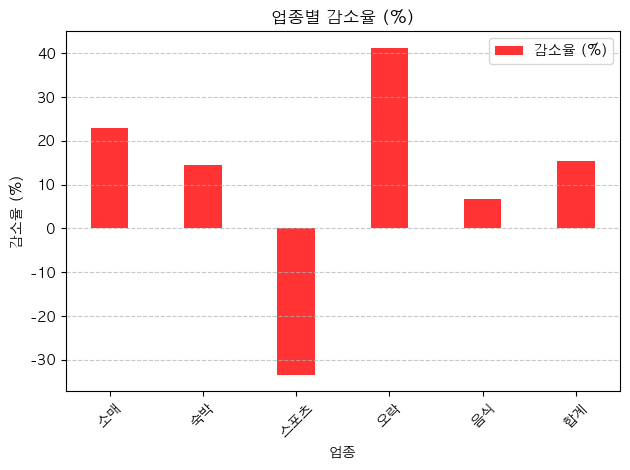

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import platform

# 한글 폰트 설정
if platform.system() == "Darwin":  # macOS
    plt.rc("font", family="AppleGothic")

plt.rcParams["axes.unicode_minus"] = False  # 마이너스(-) 기호가 깨지는 문제 해결


# 데이터프레임 생성
decrease_rate_df = pd.DataFrame({
    "업종": df_2019.index,
    "감소율 (%)": decrease_rate
}).reset_index(drop=True)
decrease_rate_df.set_index("업종", inplace=True)


# 감소율
plt.bar(
    index, 
    decrease_rate_df["감소율 (%)"], 
    bar_width, 
    label="감소율 (%)", 
    color="red", 
    alpha=0.8
)

# 그래프 설정
plt.title("업종별 감소율 (%)")
plt.ylabel("감소율 (%)")
plt.xlabel("업종")
plt.xticks(index, decrease_rate_df.index, rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
from IPython.display import display

# 데이터 준비
region_data_2019 = {
    "지역": ["경기도", "부산광역시", "서울특별시", "제주특별자치도"],
    "합계": [442393, 112504, 272907, 34908]
}

region_data_2021 = {
    "지역": ["경기도", "부산광역시", "서울특별시", "제주특별자치도"],
    "합계": [364623, 100393, 227501, 36550]
}

# 데이터프레임 생성
df_2019 = pd.DataFrame(region_data_2019)
df_2021 = pd.DataFrame(region_data_2021)


# 감소율 계산
decrease_rate = ((df_2019["합계"] - df_2021["합계"]) / df_2019["합계"] * 100).round(2)

# 데이터프레임 생성
df_analysis = pd.DataFrame({
    "지역": df_2019["지역"],
    "2019 합계": df_2019["합계"],
    "2021 합계": df_2021["합계"],
    "감소율 (%)": decrease_rate,
})

# 결과 출력
styled_df_analysis = df_analysis.style.set_properties(**{
    'text-align': 'left',
    'border': '1px solid black',
    'background-color': '#f9f9f9'
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}])

print("\n지역별 감소율 분석:")
display(styled_df_analysis)



지역별 감소율 분석:


,지역,2019 합계,2021 합계,감소율 (%)
0,경기도,442393,364623,17.580000
1,부산광역시,112504,100393,10.760000
2,서울특별시,272907,227501,16.640000
3,제주특별자치도,34908,36550,-4.700000


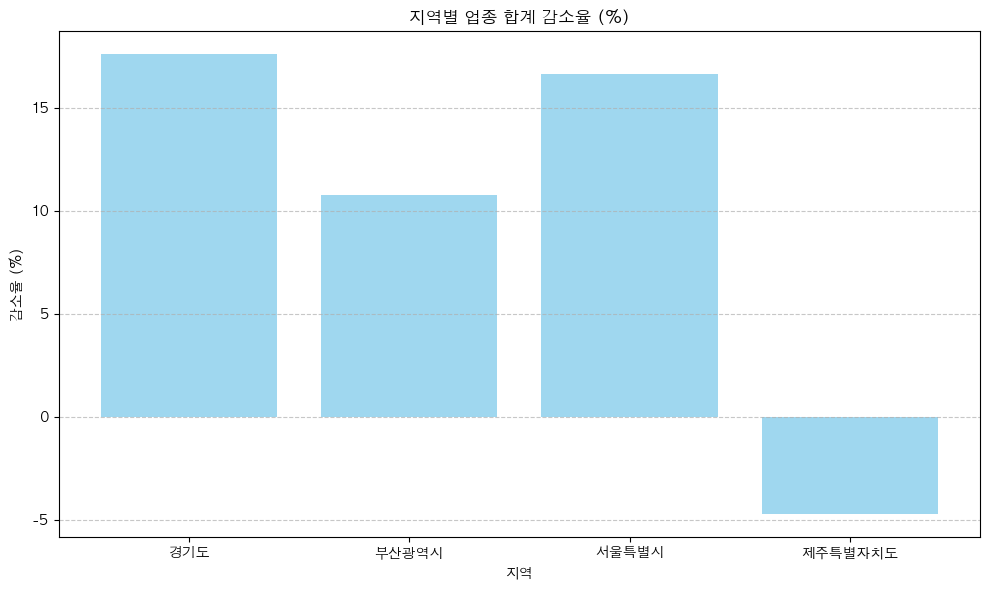

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(df_analysis["지역"], df_analysis["감소율 (%)"], color="skyblue", alpha=0.8)
plt.title("지역별 업종 합계 감소율 (%)")
plt.xlabel("지역")
plt.ylabel("감소율 (%)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


In [29]:
from scipy.stats import ttest_1samp
import pandas as pd
from IPython.display import display

# 데이터 준비
data_2019 = {
    "업종": ["소매", "숙박", "스포츠", "오락", "음식"],
    "경기도": [205799, 6385, 4362, 19123, 206724],
    "부산광역시": [52808, 2193, 790, 4685, 52028],
    "서울특별자치도": [124782, 3047, 1846, 11545, 131687],
    "제주특별자치도": [13307, 2826, 286, 893, 17596]
}

data_2021 = {
    "업종": ["소매", "숙박", "스포츠", "오락", "음식"],
    "경기도": [158674, 5503, 5530, 11080, 183836],
    "부산광역시": [44740, 1665, 1290, 2832, 49866],
    "서울특별자치도": [89857, 2322, 2516, 6603, 126203],
    "제주특별자치도": [12369, 2859, 387, 757, 20178]
}

# 데이터프레임 생성
df_2019 = pd.DataFrame(data_2019)
df_2021 = pd.DataFrame(data_2021)

# 감소율 계산
decrease_rate = pd.DataFrame({
    "업종": df_2019["업종"]
})
for region in data_2019.keys():
    if region != "업종":
        decrease_rate[region] = ((df_2019[region] - df_2021[region]) / df_2019[region] * 100).round(2)
        
# 단일 표본 T-검정 수행
benchmark = 15
t_test_results = []

for _, row in decrease_rate.iterrows():
    numeric_data = row[1:].astype(float)  # 숫자형 변환 추가
    t_stat, p_value = ttest_1samp(numeric_data, benchmark)
    p_value_one_tailed = p_value / 2 if t_stat > 0 else 1 - (p_value / 2)
    t_test_results.append({
        "업종": row["업종"],
        "T-통계량": round(t_stat, 4),
        "p-value (단측)": round(p_value_one_tailed, 6),
        "검정결과": "귀무가설 기각 (평균 감소율이 15%보다 큼)" if p_value_one_tailed < 0.05 else "귀무가설 채택 (평균 감소율이 15%보다 크다고 볼 수 없음)"
    })

# 결과 데이터프레임 생성
df_t_test_results = pd.DataFrame(t_test_results)

# 결과 출력
styled_results = df_t_test_results.style.set_properties(**{
    'text-align': 'left',
    'border': '1px solid black',
    'background-color': '#f9f9f9'
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}])

print("\n업종별 감소율 T-검정 결과:")
display(styled_results)



업종별 감소율 T-검정 결과:


,업종,T-통계량,p-value (단측),검정결과
0,소매,0.723000,0.260969,귀무가설 채택 (평균 감소율이 15%보다 크다고 볼 수 없음)
1,숙박,0.021500,0.492103,귀무가설 채택 (평균 감소율이 15%보다 크다고 볼 수 없음)
2,스포츠,-6.999300,0.997006,귀무가설 채택 (평균 감소율이 15%보다 크다고 볼 수 없음)
3,오락,3.018100,0.028423,귀무가설 기각 (평균 감소율이 15%보다 큼)
4,음식,-2.499700,0.956135,귀무가설 채택 (평균 감소율이 15%보다 크다고 볼 수 없음)


In [33]:
from scipy.stats import ttest_1samp
import pandas as pd
from IPython.display import display

# 데이터 준비
data_2019 = {
    "업종": ["소매", "숙박", "스포츠", "오락", "음식"],
    "경기도": [205799, 6385, 4362, 19123, 206724],
    "부산광역시": [52808, 2193, 790, 4685, 52028],
    "서울특별자치도": [124782, 3047, 1846, 11545, 131687],
    "제주특별자치도": [13307, 2826, 286, 893, 17596]
}

data_2021 = {
    "업종": ["소매", "숙박", "스포츠", "오락", "음식"],
    "경기도": [158674, 5503, 5530, 11080, 183836],
    "부산광역시": [44740, 1665, 1290, 2832, 49866],
    "서울특별자치도": [89857, 2322, 2516, 6603, 126203],
    "제주특별자치도": [12369, 2859, 387, 757, 20178]
}

# 데이터프레임 생성
df_2019 = pd.DataFrame(data_2019).set_index("업종")
df_2021 = pd.DataFrame(data_2021).set_index("업종")

# 감소율 계산
decrease_rate = ((df_2019 - df_2021) / df_2019 * 100).round(2)

# 기준값 설정 (15%)
benchmark = 15

# 업종별 T-검정 수행
t_test_results_by_industry = []
for industry, row in decrease_rate.iterrows():
    numeric_data = row.astype(float)
    t_stat, p_value = ttest_1samp(numeric_data, benchmark)
    p_value_one_tailed = p_value / 2 if t_stat > 0 else 1 - (p_value / 2)
    t_test_results_by_industry.append({
        "업종": industry,
        "T-통계량": round(t_stat, 4),
        "p-value (단측)": round(p_value_one_tailed, 6),
        "검정결과": "귀무가설 기각 (평균 감소율이 15%보다 큼)" if p_value_one_tailed < 0.05 else "귀무가설 채택 (평균 감소율이 15%보다 크다고 볼 수 없음)"
    })

# 지역별 T-검정 수행
t_test_results_by_region = []
for region in df_2019.columns:
    t_stat, p_value = ttest_1samp(decrease_rate[region], benchmark)
    p_value_one_tailed = p_value / 2 if t_stat > 0 else 1 - (p_value / 2)
    t_test_results_by_region.append({
        "지역": region,
        "T-통계량": round(t_stat, 4),
        "p-value (단측)": round(p_value_one_tailed, 6),
        "검정결과": "귀무가설 기각 (평균 감소율이 15%보다 큼)" if p_value_one_tailed < 0.05 else "귀무가설 채택 (평균 감소율이 15%보다 크다고 볼 수 없음)"
    })

# 결과 데이터프레임 생성
df_t_test_results_industry = pd.DataFrame(t_test_results_by_industry)
df_t_test_results_region = pd.DataFrame(t_test_results_by_region)

# 결과 출력 - 업종별
print("\n업종별 감소율 T-검정 결과:")
display(df_t_test_results_industry.style.set_properties(**{
    'text-align': 'left',
    'border': '1px solid black',
    'background-color': '#f9f9f9'
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}]))

# 결과 출력 - 지역별
print("\n지역별 감소율 T-검정 결과:")
display(df_t_test_results_region.style.set_properties(**{
    'text-align': 'left',
    'border': '1px solid black',
    'background-color': '#f9f9f9'
}).set_table_styles([{
    'selector': 'th',
    'props': [('text-align', 'left')]
}]))



업종별 감소율 T-검정 결과:


,업종,T-통계량,p-value (단측),검정결과
0,소매,3.785700,0.016158,귀무가설 기각 (평균 감소율이 15%보다 큼)
1,숙박,2.380800,0.048773,귀무가설 기각 (평균 감소율이 15%보다 큼)
2,스포츠,-5.231100,0.993203,귀무가설 채택 (평균 감소율이 15%보다 크다고 볼 수 없음)
3,오락,5.140000,0.007134,귀무가설 기각 (평균 감소율이 15%보다 큼)
4,음식,0.032600,0.488036,귀무가설 채택 (평균 감소율이 15%보다 크다고 볼 수 없음)



지역별 감소율 T-검정 결과:


,지역,T-통계량,p-value (단측),검정결과
0,경기도,1.032700,0.180040,귀무가설 채택 (평균 감소율이 15%보다 크다고 볼 수 없음)
1,부산광역시,0.166300,0.438009,귀무가설 채택 (평균 감소율이 15%보다 크다고 볼 수 없음)
2,서울특별자치도,0.840800,0.223888,귀무가설 채택 (평균 감소율이 15%보다 크다고 볼 수 없음)
3,제주특별자치도,-0.762500,0.755886,귀무가설 채택 (평균 감소율이 15%보다 크다고 볼 수 없음)


In [34]:
# 스포츠와 음식 업종만 필터링
selected_industries = ["스포츠", "음식"]
filtered_2019 = df_2019.loc[selected_industries]
filtered_2021 = df_2021.loc[selected_industries]

# 결과를 출력
print("\n스포츠와 음식 업종의 각 지역별 2019년 데이터:")
display(filtered_2019)

print("\n스포츠와 음식 업종의 각 지역별 2021년 데이터:")
display(filtered_2021)


스포츠와 음식 업종의 각 지역별 2019년 데이터:


,경기도,부산광역시,서울특별자치도,제주특별자치도
업종,,,,
스포츠,4362,790,1846,286
음식,206724,52028,131687,17596



스포츠와 음식 업종의 각 지역별 2021년 데이터:


,경기도,부산광역시,서울특별자치도,제주특별자치도
업종,,,,
스포츠,5530,1290,2516,387
음식,183836,49866,126203,20178


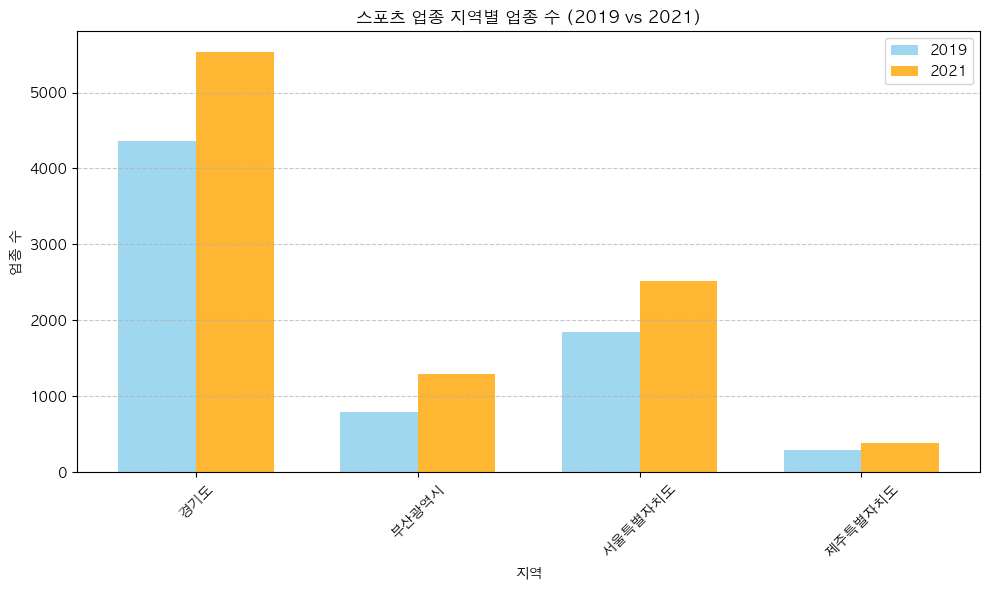

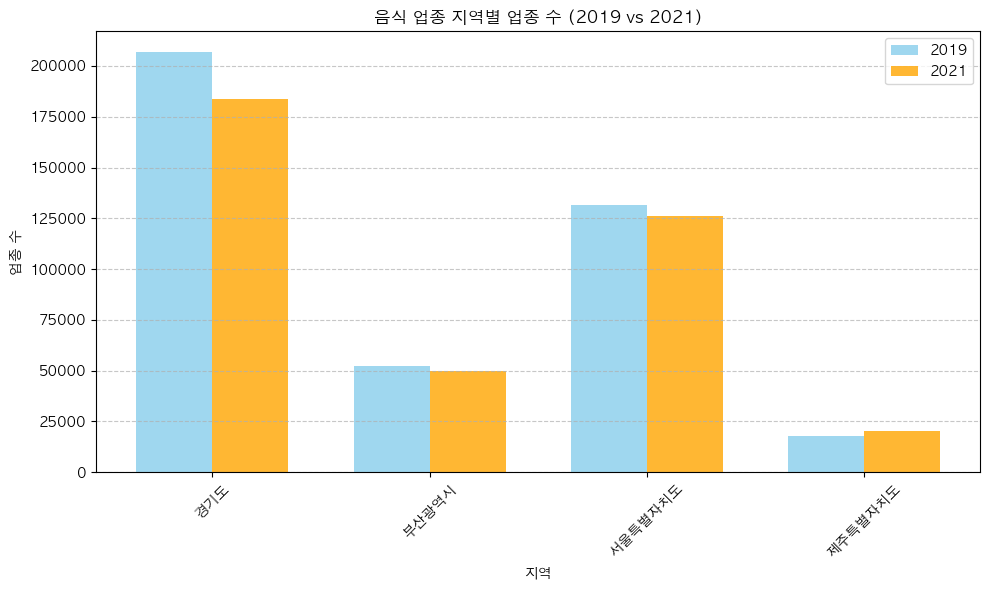

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비
selected_industries = ["스포츠", "음식"]
filtered_2019 = df_2019.loc[selected_industries]
filtered_2021 = df_2021.loc[selected_industries]

# 한글 폰트 설정 (Mac OS 기준)
plt.rc("font", family="AppleGothic")
plt.rcParams["axes.unicode_minus"] = False  # 마이너스(-) 기호 깨짐 방지

# 스포츠 데이터 시각화
regions = filtered_2019.columns
x = np.arange(len(regions))  # X축 위치
width = 0.35  # 막대 너비

plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, filtered_2019.loc["스포츠"], width, label="2019", alpha=0.8, color="skyblue")
plt.bar(x + width / 2, filtered_2021.loc["스포츠"], width, label="2021", alpha=0.8, color="orange")
plt.title("스포츠 업종 지역별 업종 수 (2019 vs 2021)")
plt.xlabel("지역")
plt.ylabel("업종 수")
plt.xticks(x, regions, rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# 음식 데이터 시각화
plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, filtered_2019.loc["음식"], width, label="2019", alpha=0.8, color="skyblue")
plt.bar(x + width / 2, filtered_2021.loc["음식"], width, label="2021", alpha=0.8, color="orange")
plt.title("음식 업종 지역별 업종 수 (2019 vs 2021)")
plt.xlabel("지역")
plt.ylabel("업종 수")
plt.xticks(x, regions, rotation=45)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()
